In [4]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

In [5]:
df_labeled = pd.read_parquet('../../data/processed/ds_labeled.parquet')

In [6]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype              
---  ------                              --------------   -----              
 0   id_prenotazione                     460509 non-null  object             
 1   id_paziente                         460509 non-null  object             
 2   data_nascita                        460509 non-null  datetime64[ns, UTC]
 3   sesso                               460509 non-null  object             
 4   regione_residenza                   460509 non-null  object             
 5   tipologia_servizio                  460509 non-null  object             
 6   descrizione_attivita                460509 non-null  object             
 7   data_contatto                       460509 non-null  object             
 8   tipologia_struttura_erogazione      460509 non-null  object             
 9   id_professionista_sanitari

In [7]:
cols_to_drop = df_labeled.columns[[0,1,2,3,5,7,9,11,12,14,15]]
df = df_labeled.drop(columns=cols_to_drop)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 6 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   regione_residenza                   460509 non-null  object
 1   descrizione_attivita                460509 non-null  object
 2   tipologia_struttura_erogazione      460509 non-null  object
 3   tipologia_professionista_sanitario  460509 non-null  object
 4   fascia_eta                          460509 non-null  object
 5   incremento_teleassistenze           460509 non-null  object
dtypes: object(6)
memory usage: 21.1+ MB


In [9]:
df.columns

Index(['regione_residenza', 'descrizione_attivita',
       'tipologia_struttura_erogazione', 'tipologia_professionista_sanitario',
       'fascia_eta', 'incremento_teleassistenze'],
      dtype='object')

## Elbow Method

L'Elbow Method consiste nel:

1. Eseguire K-Prototypes per una gamma di valori di 
𝑘 (ad esempio, da 1 a 10).
2. Calcolare il "Costo" (o l'inertia): La funzione di costo (inertia) misura la somma delle distanze tra i punti dati e i loro rispettivi centroidi.
3. Tracciare il Costo: Tracciare il costo rispetto ai diversi valori di 
𝑘.
4. Identificare l'Elbow (gomito): Il punto in cui il tasso di riduzione della funzione di costo inizia a diminuire significativamente. Questo punto rappresenta il numero ottimale di cluster.

In [10]:
#X = df.to_numpy()

In [11]:
categorical_columns = [0,1,2,3,4,5]

In [12]:
cost = []
K = range(1, 13) # Range di valori per k (numero di cluster)

In [ ]:
for numero_cluster in K:
    kmodes = KModes(n_clusters=numero_cluster, init='Huang', n_init=5, verbose=1)
    kmodes.fit_predict(df)
    cost.append(kmodes.cost_) # Calcolo del costo

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1839308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1839308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1839308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1839308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1839308.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 161388, cost: 1620717.0
Run 1, iteration: 2/100, moves: 11579, cost: 1620717.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 99203, cost: 1643331

In [48]:
# for numero_cluster in K:
#     kproto = KPrototypes(n_clusters=numero_cluster, init='Huang', n_init = 3 , verbose=1)
#     kproto.fit_predict(df, categorical = categorical_columns)
#     cost.append(kproto.cost_)

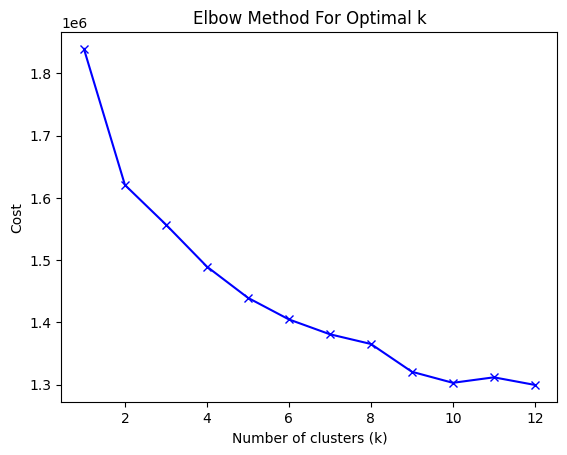

In [49]:
# Grafica il costo per ogni k
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig('../../data/graph/elbow_method.png')
plt.show()

In [13]:
kmodes = KModes(n_clusters=4, init='Huang', n_init=10, verbose=1)

In [14]:
clusters = kmodes.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 39236, cost: 1523403.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 157615, cost: 1487982.0
Run 2, iteration: 2/100, moves: 45716, cost: 1487982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 170048, cost: 1507698.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 124638, cost: 1559583.0
Run 4, iteration: 2/100, moves: 4839, cost: 1559583.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 88699, cost: 1505299.0
Run 5, iteration: 2/100, moves: 19094, cost: 1496915.0
Run 5, iteration: 3/100, moves: 4651, cost: 1496915.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100,

## KPrototypes



- n_clusters=3`: Questo è il numero di cluster che l'algoritmo cercherà di identificare nei tuoi dati. In questo caso, stai chiedendo all'algoritmo di trovare 3 cluster.
- init='Huang'`: Questo è il metodo di inizializzazione che l'algoritmo utilizzerà per inizializzare i centroidi. In questo caso, stai utilizzando il metodo di inizializzazione di Huang.
- n_init=5`: Questo è il numero di volte che l'algoritmo verrà eseguito con diverse inizializzazioni dei centroidi. L'algoritmo restituirà il modello con la migliore inizializzazione.
- verbose=1`: Questo è il livello di verbosità dell'algoritmo. Più alto è il valore, più informazioni verranno stampate a schermo durante l'esecuzione dell'algoritmo.

In [15]:
# Crea un'istanza dell'algoritmo K-Prototype
# kproto = KPrototypes(n_clusters=6, init='Huang', n_init=5, verbose=1)


In [16]:
# Adatta l'algoritmo ai dati
# Devi specificare le colonne dei dati categorici
# clusters = kproto.fit_predict(df, categorical=[0, 1, 2])  # sostituisci con le tue colonne categoriche

In [17]:
np.unique(clusters) 

array([0, 1, 2, 3], dtype=uint16)

In [18]:
df['cluster'] = clusters

In [19]:
df.to_parquet('../../data/processed/clustered_data.parquet')

In [20]:
df.head()

,regione_residenza,descrizione_attivita,tipologia_struttura_erogazione,tipologia_professionista_sanitario,fascia_eta,incremento_teleassistenze,cluster
0,Piemonte,Insegnamento al paziente e/o alla sua famiglia...,Azienda Ospedaliera,Infermiere,36-47,high_increment,2
1,Toscana,Prestazione infermieristica connessa alla nece...,Azienda Ospedaliera Universitaria,Infermiere,48-59,high_increment,0
2,Emilia romagna,Prestazione dietistica,Ospedale a gestione diretta,Dietista,36-47,high_increment,0
3,Campania,Psicoterapia individuale,Azienda Ospedaliera,Psicologo,48-59,high_increment,2
4,Abruzzo,Prestazione dietistica,Ospedale a gestione diretta,Dietista,60-69,high_increment,0


# Calculate Purity

In [21]:
true_labels = df_labeled.incremento_teleassistenze.to_numpy()

In [22]:
true_labels

array(['high_increment', 'high_increment', 'high_increment', ...,
       'high_increment', 'high_increment', 'high_increment'], dtype=object)

In [23]:
from collections import Counter

In [24]:
def calculate_purity(clusters, true_labels):
    print('Clusters:', clusters)

    N = len(true_labels) # number of data points
    purity_sum = 0

    for cluster_id in np.unique(clusters):
        # Obtain the indices of data points in the cluster
        print(cluster_id)

        cluster_indices = np.where(clusters == cluster_id)[0] # [0] to get the array from the tuple, as np.where returns a tuple
        print('Cluster indices:', cluster_indices)

        # Obtain the true labels of data points in the cluster
        cluster_labels = true_labels[cluster_indices]
        print('Cluster labels', cluster_labels)

        # Count the number of data points in each class
        most_common_label, count = Counter(cluster_labels).most_common(1)[0] # most_common returns a list of tuples, we take the first one
        print(f'Most common label: {most_common_label}, count: {count}')

        purity_sum += count
        print('\n')

    purity = purity_sum / N
    return purity



In [25]:
purity = calculate_purity(clusters, true_labels)
print('Purity is:', purity)

Clusters: [2 0 0 ... 0 0 0]
0
Cluster indices: [     1      2      4 ... 460506 460507 460508]
Cluster labels ['high_increment' 'high_increment' 'high_increment' ... 'high_increment'
 'high_increment' 'high_increment']
Most common label: high_increment, count: 162436


1
Cluster indices: [    35     50     56 ... 460499 460501 460504]
Cluster labels ['high_increment' 'high_increment' 'medium_increment' ... 'low_increment'
 'low_increment' 'constant_increment']
Most common label: low_increment, count: 93819


2
Cluster indices: [     0      3     12 ... 460469 460485 460502]
Cluster labels ['high_increment' 'high_increment' 'high_increment' ... 'medium_increment'
 'low_increment' 'low_increment']
Most common label: medium_increment, count: 27304


3
Cluster indices: [    96    303    512 ... 460500 460503 460505]
Cluster labels ['medium_increment' 'high_increment' 'high_increment' ... 'low_increment'
 'low_increment' 'low_increment']
Most common label: low_increment, count: 56033


Puri